100
100


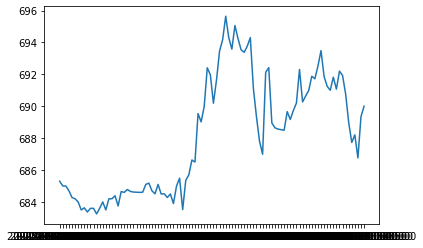

In [47]:
from datetime import time
import dotenv as env
from dotenv import load_dotenv
import os
import matplotlib
import matplotlib.pyplot as plt



load_dotenv(dotenv_path='./stuff.env')

token = os.getenv('TOKEN')


import requests
import pandas as pd
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=5min&apikey={token}'
r = requests.get(url)
data = r.json()

#print(data)
TSLA = pd.DataFrame(data)
#print(TSLA)

TSLAmin = data['Time Series (5min)']

more = pd.DataFrame(TSLAmin)
#print(more)

price = []
timeperiod = []
for keys in TSLAmin:
    price.append(float(TSLAmin[keys]['1. open']))
    timeperiod.append(keys)

#print(timeperiod)

import numpy as np


y = np.array(price)
x = timeperiod


plt.plot(x,y)
print(y.size)
print(len(x))



In [44]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=TSLA&apikey={token}'
rmonth = requests.get(url)
datamonth = rmonth.json()

#print(datamonth['Monthly Time Series'])
monthlydata = [[],[]]
for keys in datamonth['Monthly Time Series']:
    monthlydata[0].append(keys)
    monthlydata[1].append(float(datamonth['Monthly Time Series'][keys]['1. open']))

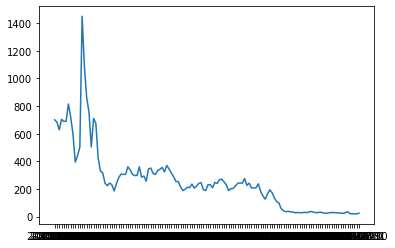

In [46]:
y_ = monthlydata[1]
x_ = monthlydata[0]
plt.plot(x_,y_)

In [48]:
from datetime import time
import dotenv as env
from dotenv import load_dotenv
import os
import matplotlib
import matplotlib.pyplot as plt



load_dotenv(dotenv_path='./stuff.env')




import requests
import pandas as pd
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
import numpy as np

token = os.getenv('TOKEN');
class Ticker:
    def __init__(self,ticker:str):
        
        self.ticker = ticker;
        self.daily = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol='+ self.ticker + '&apikey={token}').json();
        self.intraday = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol='+ self.ticker +'&interval=5min&apikey={token}').json();
        self.monthly = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol='+ self.ticker +'&apikey={token}').json();
        self.daily_data = {'date' : [],'open' : [], 'close' : [],'high' : [], 'low' : [] , 'volume' : []}
    def dailydata(self):
        daydata  = self.daily['Time Series (Daily)']
        for keys in daydata:
            self.daily_data['date'].append(keys);
            self.daily_data['open'].append(float(daydata[keys]['1. open']))
            self.daily_data['high'].append(float(daydata[keys]['2. high']))
            self.daily_data['low'].append(float(daydata[keys]['3. low']))
            self.daily_data['close'].append(float(daydata[keys]['4. close']))
            self.daily_data['volume'].append(int(daydata[keys]['5. volume']))
        
        return self.daily_data


        
        


        
        


TSLA = Ticker('TSLA')



data = TSLA.dailydata()
#print(data)


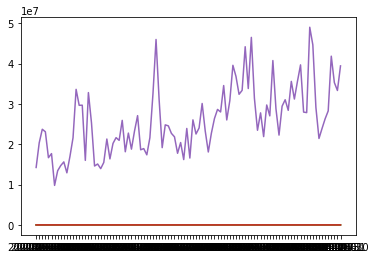

In [50]:
plt.plot(data['date'],data['open'], label = "open")
plt.plot(data['date'],data['close'], label = "close")
plt.plot(data['date'],data['high'], label = "high")
plt.plot(data['date'],data['low'], label = "low")
#plt.plot(data['date'],data['volume'], label = "open")
plt.show()
